# **1.1. IMPORTING DATASET**

In [1]:
import pandas as pd

In [2]:
ds=pd.read_csv(r"Crude_Oil_Prices.csv")

In [3]:
ds.shape

(9315, 2)

In [4]:
ds.head

<bound method NDFrame.head of             Date  Value
0     02-01-1986  25.56
1     03-01-1986  26.00
2     06-01-1986  26.53
3     07-01-1986  25.85
4     08-01-1986  25.87
...          ...    ...
9310  12-11-2022    NaN
9311  13-11-2022    NaN
9312  14-11-2022    NaN
9313  15-11-2022    NaN
9314  16-11-2022    NaN

[9315 rows x 2 columns]>

# **1.2. IMPORTING LIBRARIES**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1.3. HANDLING_MISSING_VALUES**

In [6]:
ds.isnull().sum()


Date      0
Value    21
dtype: int64

In [7]:
hd=ds.dropna()
print(hd)

            Date  Value
0     02-01-1986  25.56
1     03-01-1986  26.00
2     06-01-1986  26.53
3     07-01-1986  25.85
4     08-01-1986  25.87
...          ...    ...
9289  20-10-2022  85.98
9290  21-10-2022  85.05
9291  24-10-2022  84.92
9292  25-10-2022  84.79
9293  26-10-2022  88.05

[9294 rows x 2 columns]


In [8]:
hd.isnull().sum()

Date     0
Value    0
dtype: int64

# **1.4. FEATURE_SCALING**

In [9]:
from sklearn import preprocessing

In [10]:
prepro = hd.iloc[:, 1:2].values
print ("\nOriginal data values : \n",  prepro)


Original data values : 
 [[25.56]
 [26.  ]
 [26.53]
 ...
 [84.92]
 [84.79]
 [88.05]]


In [11]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(prepro)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.55286539]
 [0.55190286]
 [0.57604028]]


In [12]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(prepro)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-0.68979433]
 [-0.67488539]
 [-0.65692689]
 ...
 [ 1.32155776]
 [ 1.31715284]
 [ 1.42761456]]


# **1.5. DATA_VISUALIZATION**

In [13]:
def strtodate(inp):
  import datetime
  return(datetime.datetime.strptime(inp,'%d-%m-%Y'))

hd.Date=hd.Date.apply(strtodate)
print(hd.Date)

0      1986-01-02
1      1986-01-03
2      1986-01-06
3      1986-01-07
4      1986-01-08
          ...    
9289   2022-10-20
9290   2022-10-21
9291   2022-10-24
9292   2022-10-25
9293   2022-10-26
Name: Date, Length: 9294, dtype: datetime64[ns]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
DF = pd.DataFrame()
DF['value'] = hd.Value
DF = DF.set_index(hd.Date)
DF

,value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2022-10-20,85.98
2022-10-21,85.05
2022-10-24,84.92


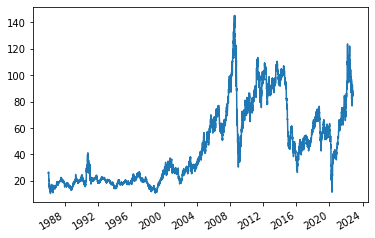

In [15]:
plt.plot(DF)
plt.gcf().autofmt_xdate()
plt.show()

# **1.6. SPLITTING_DATA_INTO_TRAINING_DATA_AND_TESTING_DATA**

In [16]:
hd['TV1'] = hd['Value'].shift(1).rolling(window=3).mean()
hd['TV2']= hd['Value'].shift(1).rolling(window=9).mean()
hd = hd.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
x = hd[['TV1','TV2']]
x.head

<bound method NDFrame.head of             TV1        TV2
9     25.233333  25.726667
10    25.076667  25.684444
11    24.710000  25.460000
12    24.263333  25.137778
13    22.980000  24.635556
...         ...        ...
9289  85.230000  87.744444
9290  85.236667  87.004444
9291  85.670000  86.358889
9292  85.316667  85.945556
9293  84.920000  85.675556

[9285 rows x 2 columns]>

In [18]:
x = hd[['Date','TV1','TV2']]
x.set_index('Date',inplace=True)
x.head()

,TV1,TV2
Date,,
1986-01-15,25.233333,25.726667
1986-01-16,25.076667,25.684444
1986-01-17,24.710000,25.460000
1986-01-20,24.263333,25.137778
1986-01-21,22.980000,24.635556


In [19]:
y = hd[['Date','Value']]
y.set_index('Date',inplace=True)
y.head()

,Value
Date,
1986-01-15,25.18
1986-01-16,23.98
1986-01-17,23.63
1986-01-20,21.33
1986-01-21,20.61


In [20]:
t = int(len(hd)*0.8)

# Training dataset
x_train = x[:t]
y_train = y[:t]

# Testing dataset
x_test = x[t:]
y_test = y[t:]

In [21]:
Date=y_test.index

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

In [23]:
index=0
predicted_price = model.predict(x_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Value'])

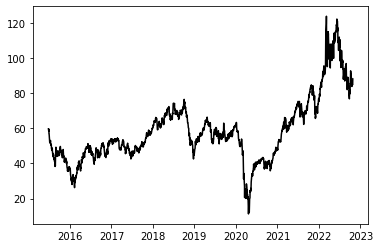

In [31]:
plt.plot(y_test, color="black")
plt.show()

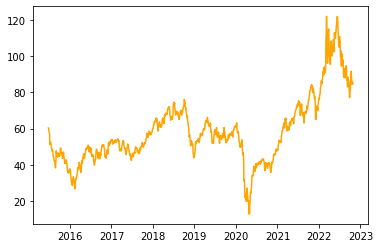

In [28]:
plt.plot(predicted_price, color="orange")
plt.show()

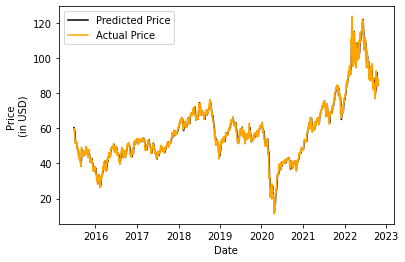

In [37]:
fig, ax = plt.subplots()
ax.plot(Date, predicted_price, color="black")
ax.plot(Date, y_test, color="orange")
plt.legend(['Predicted Price','Actual Price'])
plt.xlabel("Date")
plt.ylabel("Price \n(in USD)")
plt.show()

In [38]:
Prediction_boolean = predicted_price['Value'] < y_test['Value']
accuracy = 0
Prediction_int=np.multiply(Prediction_boolean, 1)
accuracy_array = np.where(Prediction_int.eq(1) , predicted_price['Value']/y_test['Value']*100 , y_test['Value']/predicted_price['Value']*100)
accuracy = np.mean(accuracy_array)
print("Accuracy = "'%.2f' %accuracy + " %")

Accuracy = 97.67 %
